# Object Detection in Google Colab with Fizyr Retinanet

Colab notebook providing steps taken to train a Keras/Tensorflow model of RetinaNet for object detection with a custom dataset.

It runs in Google Colab using [Fizyr implementation](https://github.com/fizyr/keras-retinanet) of RetinaNet in Keras.

# Environment Setup
Update keras. Download and install in Colab required packages and import libraries.

In [0]:
!pip install q keras==2.3.0

In [0]:
!git clone https://github.com/fizyr/keras-retinanet.git

In [0]:
%cd keras-retinanet/

!pip install .

In [0]:
!python setup.py build_ext --inplace

# **Import CSV Data from Google Drive.**

In [0]:
import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas as pd
from google.colab import drive
from google.colab import files

In [0]:
!pip install PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive as dv
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Make Google Drive data accesible by rest of file and download the two csv files


In [0]:
dv.mount('/content/drive')

In [0]:
downloaded_train = drive.CreateFile({'id':"1NQg0ev-eGJeLwF2m5tzsb6ACc18mVHJx"})   # replace the id with id of file you want to access
downloaded_train.GetContentFile('RetinaNetTrainData2.csv') 

downloaded_classes = drive.CreateFile({'id':"1J8o9UgMIyph5D0hfBaVZ1sxVzDOm3irh"})   # replace the id with id of file you want to access
downloaded_classes.GetContentFile('RetinaNetClasses.csv') 

In [0]:
train_data = pd.read_csv('RetinaNetTrainData2.csv', header=None)
class_data = pd.read_csv('RetinaNetClasses.csv', header=None)

In [0]:
train_data.head()

,0,1,2,3,4,5
0,/content/drive/My Drive/CityCam/410/410-201604...,159,73,178,85,vehicle
1,/content/drive/My Drive/CityCam/410/410-201604...,176,61,198,78,vehicle
2,/content/drive/My Drive/CityCam/410/410-201604...,260,71,294,96,vehicle
3,/content/drive/My Drive/CityCam/410/410-201604...,280,63,290,73,vehicle
4,/content/drive/My Drive/CityCam/410/410-201604...,306,94,327,113,vehicle


In [0]:
class_data.head()

,0,1
0,vehicle,0
1,passengers,1


# Training Model

Download pretrained model and run training.

In the next cell choose one option:

1.   download Fizyr Resnet50 pretrained model
2.   download your custom pretrained model, to continue previous training epochs

In the last cell optionally export trained model to Google Drive.


In [0]:
PRETRAINED_MODEL = 'snapshots/_pretrained_model.h5'

#### OPTION 1: DOWNLOAD INITIAL PRETRAINED MODEL FROM FIZYR ####
#URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
#urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

#### OPTION 2: DOWNLOAD CUSTOM PRETRAINED MODEL FROM GOOGLE DRIVE. CHANGE DRIVE_MODEL VALUE. USE THIS TO CONTINUE PREVIOUS TRAINING EPOCHS ####
dv.mount('/content/drive')
DRIVE_MODEL = '/content/drive/My Drive/resnet50_csv_10.h5'
shutil.copy(DRIVE_MODEL, PRETRAINED_MODEL)


print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

In [0]:
#!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 8 --steps 1095 --epochs 10 --snapshot-path snapshots csv RetinaNetTrainData2.csv RetinaNetClasses.csv

## Model Architecture

Below is a screenshot of the entire network architecture used to train this model. This RetinaNet model was created by the company Fizyr. We began training based on the resnet50 pretrained model on the Coco dataset to make the training process faster. 

![test](https://docs.google.com/uc?export=download&id=14neot_K_IYfMZjqb6hbq42cC_Xp52j2_)
![test](https://docs.google.com/uc?export=download&id=1om4IJPndMZf56PdvBOoCCDXaqSBEg_1W)
![test](https://docs.google.com/uc?export=download&id=1HonRsi0tXgxr4xmD1BczBvZAn4sSZe-J)
![test](https://docs.google.com/uc?export=download&id=1L9ZKyqvadfrVyvMCMeJTmRrGL8DWx6tj)
![test](https://docs.google.com/uc?export=download&id=1Q8aHbxuPA13yCA0f7yw8pBFxl0nIPGDh)
![test](https://docs.google.com/uc?export=download&id=1Vby8NRnqDPJgKDOL0q8GNGol-xfnt6ta)
![test](https://docs.google.com/uc?export=download&id=1LcddmKzj3u50rPz94jV4Ly_RvkP5YHRw)
![test](https://docs.google.com/uc?export=download&id=1CLxb2whAZEdszQ9_EddPExhKnc7oRqf4)
![test](https://docs.google.com/uc?export=download&id=1_gvDIiKM81754R1gUVJndpUJBwyAwDPy)
![test](https://docs.google.com/uc?export=download&id=1z3Y8cUjOdJSWYQh9wTCS-5yEPAL_oFrr)



### Training Results:



Below are screenshots of the loss function updating over each epoch on the second round of training the model on the second half of the dataset:

![test](https://docs.google.com/uc?export=download&id=17Fyf-kwD2SSxYEILbMDKJghxR-KlNxlL)
![test](https://docs.google.com/uc?export=download&id=1xhlzxRYYMLSlSI7FP955V_gJic5SbCdj)

In [0]:
#### EXPORT TRAINED MODEL TO DRIVE ####
#dv.mount('/content/gdrive', force_remount=True)
#COLAB_MODEL = './snapshots/resnet50_csv_10.h5'
#DRIVE_DIR = '/content/gdrive/My Drive/'
#shutil.copy(COLAB_MODEL, DRIVE_DIR)

# Inference
Running inference with an image that was NOT used to train this model (only the first 200 pictures of each folder were used to train the model).

In [0]:
#Set threshold to only pick up bounding boxes ABOVE a certain confidence level.
THRES_SCORE = 0.4

In [0]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

In [0]:
import pandas
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv('RetinaNetClasses.csv',header=None).T.loc[0].to_dict()

In [0]:
def img_inference(img_path):
  image = read_image_bgr(img_infer)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < THRES_SCORE:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

Saving 000248.jpg to 000248.jpg
Original Image:


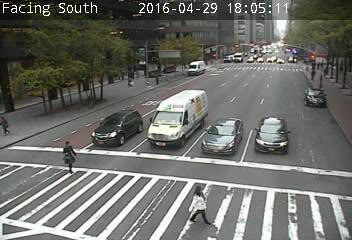

Running inference on: 000248.jpg
processing time:  0.34407544136047363


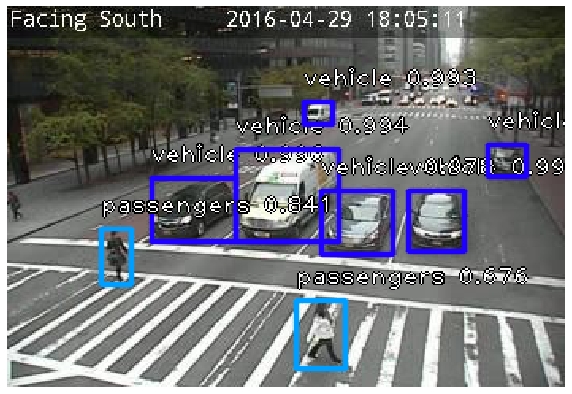

In [0]:
from IPython.display import Image, display
uploaded = files.upload()

img_infer = list(uploaded)[0]

print("Original Image:")
display(Image(img_infer,width=560,height=350))

print('Running inference on: ' + img_infer)
img_inference(img_infer)

# Evaluate Model using Test Data

In [0]:
dv.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
downloaded_train = drive.CreateFile({'id':"14u-0P20jj4ta4OYrQihXIFHtWMSQWhYj"})   # replace the id with id of file you want to access
downloaded_train.GetContentFile('RetinaNetTestData.csv') 
test_data = pd.read_csv('RetinaNetTestData.csv', header=None)
test_data.head()

,0,1,2,3,4,5
0,/content/drive/My Drive/CityCam/410/410-201604...,174,61,199,79,vehicle
1,/content/drive/My Drive/CityCam/410/410-201604...,134,124,177,160,vehicle
2,/content/drive/My Drive/CityCam/410/410-201604...,304,95,329,113,vehicle
3,/content/drive/My Drive/CityCam/410/410-201604...,290,82,308,96,vehicle
4,/content/drive/My Drive/CityCam/410/410-201604...,295,56,311,84,vehicle


In [0]:
#Convert the training model to an inference model
!keras_retinanet/bin/convert_model.py snapshots/_pretrained_model.h5 snapshots/_inference_model.h5

In [0]:
#Run evaluation script
!keras_retinanet/bin/evaluate.py csv RetinaNetTestData.csv RetinaNetClasses.csv snapshots/_inference_model.h5

## Evaluation Results:

![test](https://docs.google.com/uc?export=download&id=1-Sued7F5DsP8AtYj4du6ZEhhNKgeGfpu)

147 images were passed through the neural network in 47 seconds with precision of classes vehicle and passenger calculated. Inference time totaled 0.3005 seconds for the 147 images.

**Precision of class Vehicle over 2677 instances**: ~90% 

**Precision of class Passenger over 200 instances**: ~82%

**mAP**: ~86%

Our model is more precise at detecting vehicles than pedestrians. Based on the inference above, it is precise enough to predict roughly the amount of cars and pedestrians at any given crosswalk.



# Cross Walk Detection
We now need to use a segmentation algorithm to detect lines of the crosswalk.

I will begin by attempting to use both the Hough transform and the Probabilistic Hough transform in order to find the lines.


Saving 000004.jpg to 000004 (10).jpg
000004.jpg
Source:


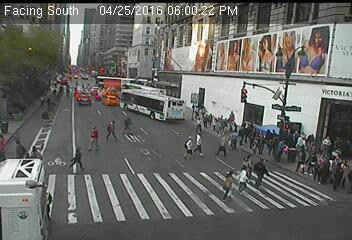

Hough Line Transform:


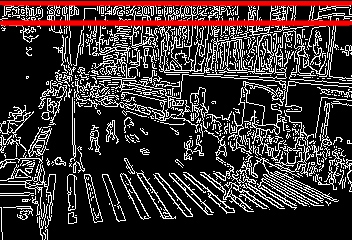

Probabilistic Hough Line Transform:


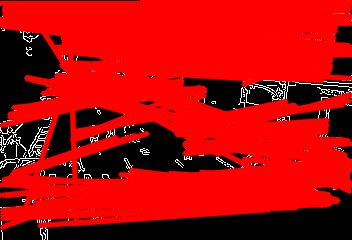

-1

In [0]:
# method for line detection 
import cv2 
import numpy as np 
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

uploaded = files.upload()
for fn in uploaded.keys():
  name = fn
print(name)
img = Image.open(BytesIO(uploaded[name]))

open_cv_image = np.array(img) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 
  

dst = cv2.Canny(open_cv_image, 50, 200, None, 3)
    
# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
    
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
    
    
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, 200, 100, 20)
    
if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
    
print("Source:")
cv2_imshow(open_cv_image)
print("Hough Line Transform:")
cv2_imshow(cdst)
print("Probabilistic Hough Line Transform:")
cv2_imshow(cdstP)
    
cv2.waitKey()


Although the probabilistic hough transform detects the crosswalk, there is way too much noise and variability in our images to effectively predict a crosswalk using this form of edge detection. Another Neural Network may need to be trained in order to detect the location of crosswalks in an image. 